# Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

# Downlaod Files:

- https://github.com/dsrscientist/bigdatamart_rep

In [1]:
#!pip install xgboost

In [2]:
#Import Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Import regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


#Import Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
#Read datasets
train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

In [4]:
#Checking train dataset
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#Checking train info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#Checking null values for train
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
#Checking test dataset
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
#Checking test info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
#Checking null values for test
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Test dataset does not contains 'Item_Outlet_Sales' column rest all the columns are same for both the datasets. As per the problem statement I need to build a predictive model to predict the sales count, sales refering to continuous data hence this is a regression problem. To predict the Sales I will be building few regression machine learning models and then will choose the best model based on their metrics.

In [10]:
#Merging both the datasets.
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [11]:
#Checking information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

# Datset has mixed of object, float and integer datatypes.

In [12]:
#Checking null values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

- Null values for Item_Outlet_Sales is from test set.
- Null values are present in Item_Weight and Outlet_Size which needs to be treated.

In [13]:
#Checking stats of the dataset
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Item_Visibility has min as 0 which can't be right as every product should have some visibility.

In [14]:
# check unique values in dataset
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

# Observations:

* There are 1559 products which is too many to be useful will see how we can categorize them in different smaller groups.
* There are 10 oulets and 16 item types.

In [15]:
#Number of datapoints and number of features
data.shape

(14204, 13)

In [16]:
#Checking categorical features
cat_columns = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'object':
        cat_columns.append(x)
        
cat_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

In [17]:
#Print the frequency of each categories 
for col in cat_columns:
    print('\nFrequency of Categories for Feature %s'%(col))
    print(data[col].value_counts())


Frequency of Categories for Feature Item_Identifier
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

Frequency of Categories for Feature Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for Feature Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for Feature 

# Observations on Categorical Columns

* In Item_Fat_Content Low Fat, LF and low fat all are refering to food items of 'low fat' category and reg, Regular both are refering to the items of 'Regular' categories.
* There are 3 types of Oulet_Size Small, Medium and High.
* I can see 3 types of Outlet_Location_Type which are Tier 1, Tier 2 and Tier 3.
* There are 4 types of Outlet types Grocery Store, Supermarket Type1, Supermarket Type2 and Supermarket Type3.

# Impute Missing Values Of Item_Weight

Assuming each Item_Identifier identifies a specific item, then it seems reasonable to impute the missing values of the Item_Weight by the average Item_Weight of each Item_Identifier. To check that, we have imputed the values in the right way, I will check the average weight per Outlet_Identifier before and after imputing the missing values.

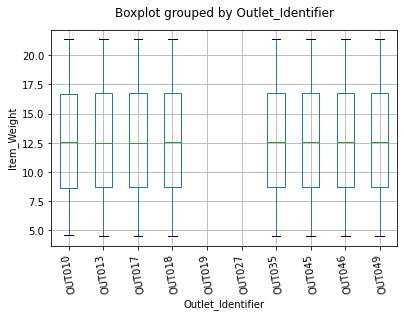

In [18]:
#Plot box plot of Item_weight vs Outlet_Identifier
box = data.boxplot(column = 'Item_Weight', by = 'Outlet_Identifier', rot = 100)
box.set_ylabel('Item_Weight')
box.set_title('')
plt.show()

This graph shows that the missing weight affects two outlets OUT019 and OUT027.

In [19]:
#Checking the everage weight of per item
item_av_weight = data.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
item_av_weight.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [20]:
#Create a mask of the missing data in Item_Weight
null_mask_weight = data['Item_Weight'].isnull()

#Impute values
data.loc[null_mask_weight, 'Item_Weight'] = data.loc[null_mask_weight, 'Item_Identifier'].apply(lambda x: item_av_weight.loc[x])

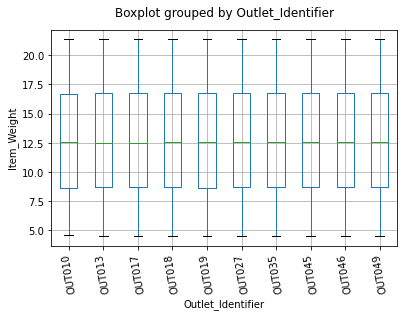

In [21]:
#Plot box plot of Item_weight vs Outlet_Identifier after imputing values
box = data.boxplot(column = 'Item_Weight', by = 'Outlet_Identifier', rot = 100)
box.set_ylabel('Item_Weight')
box.set_title('')
plt.show()

I can see that the values I have chosen to replace the missing weights are correct as the boxplot of the affected outlets now follows the same pattern as the others.

# Impute Missing Values Of Outlet_Size

I belive it would be reasonable to impute the missing values of Outlet_size by the mode size for each Outlet_Type.

In [22]:
#Lets check the mode size of each outlet type
from scipy.stats import mode #import mode

#Replace all NaN values with 'Unknown' as the mode function of stats cannot compare float and strings
data['Outlet_Size'] = data['Outlet_Size'].fillna('Unknown')

#Checking mode size per outlet_type
outlet_type_mode_size = data.pivot_table(values = 'Outlet_Size', index = 'Outlet_Type', aggfunc = (lambda x:mode(x).mode[0]))
outlet_type_mode_size

,Outlet_Size
Outlet_Type,
Grocery Store,Unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


Grocery stores could be considered to be smaller than the supermarkets, hence I can replace the 'Unknown' in the pivot table above by 'small', but let's check the the sales in each Outlet_Type to see if we can confirm this.

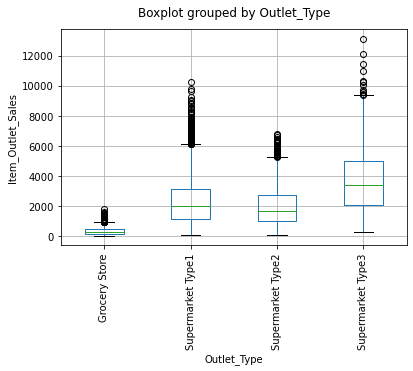

In [23]:
#Checking the Sales per Outlet_Type
ax = data.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Type', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')
plt.show()

Supermarket Type3 has the highest sales followed by Supermarket Type1 and Supermarket Type2. Grocery stores has the least sales Item_Outlet Sales count.

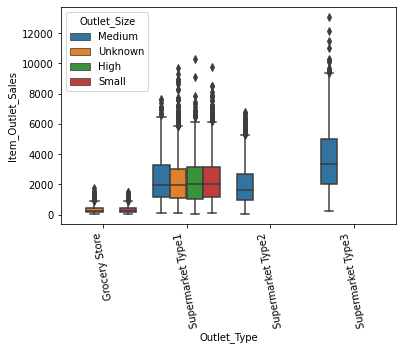

In [24]:
#Ploting a box plot to check Outlet type, item oulet sales and outlet size.
ax = sns.boxplot(data = data, x = 'Outlet_Type', y = 'Item_Outlet_Sales', hue = 'Outlet_Size', order = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 100)
plt.show()

Grocery stores report far fewer sales than the other Outlets and they have Outlet_Size values that are either 'small' or 'Unknown'. Therefore we can reasonably replace the mode value of Grocery Stores with 'small' and impute the missing values of Outlet_Size with the mode value for each Outlet_Type. To check we have done this correctly, we can visualise the Item_Outlet_Sales per Outlet_Identifier.

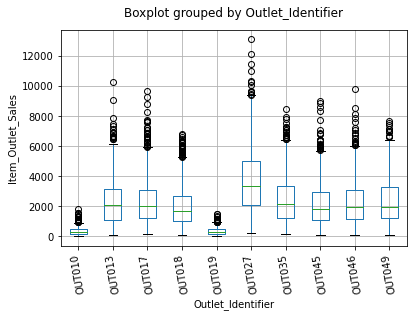

In [25]:
#Checking sales per Outlet_Identifier
ax = data.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Identifier', rot = 100)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')
plt.show()

OUT010 and OUT019 seem to be of size 'small'.

In [26]:
#Printing the Outlet_Type of OUT010 and Out019
outlet_identifier_mode_size = data.pivot_table(values='Outlet_Size', index='Outlet_Identifier', aggfunc=(lambda x:mode(x).mode[0]))
outlet_identifier_mode_size

,Outlet_Size
Outlet_Identifier,
OUT010,Unknown
OUT013,High
OUT017,Unknown
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT045,Unknown
OUT046,Small


OUT010 is unknown; after imputing missing values it should be 'small'.

In [27]:
#Replace the Outlet_Size of the Grocery Store in the pivot table with small
outlet_type_mode_size.loc['Grocery Store'] = 'Small'
outlet_type_mode_size

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [28]:
#Create a mask of the missing data in Item_Weight
null_mask_size = data['Outlet_Size'] == 'Unknown'

#Impute values
data.loc[null_mask_size, 'Outlet_Size'] = data.loc[null_mask_size, 'Outlet_Type'].apply(lambda x: outlet_type_mode_size.loc[x])

In [29]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [30]:
#Printing Outlet_Type of OUT010 and Out019 after imputation
outlet_identifier_mode_size = data.pivot_table(values = 'Outlet_Size', index = 'Outlet_Identifier', aggfunc = (lambda x:mode(x).mode[0]))
outlet_identifier_mode_size

,Outlet_Size
Outlet_Identifier,
OUT010,Small
OUT013,High
OUT017,Small
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT045,Small
OUT046,Small


In [31]:
#Printing Outlet_Type and Outlet_Identifier after imputing
data.pivot_table(values = 'Outlet_Type', index = 'Outlet_Identifier', aggfunc = (lambda x:mode(x).mode[0]))

,Outlet_Type
Outlet_Identifier,
OUT010,Grocery Store
OUT013,Supermarket Type1
OUT017,Supermarket Type1
OUT018,Supermarket Type2
OUT019,Grocery Store
OUT027,Supermarket Type3
OUT035,Supermarket Type1
OUT045,Supermarket Type1
OUT046,Supermarket Type1


# Handling Min value of Item_Visibility

In [32]:
#Checking how many entries have 0 value
data['Item_Visibility'].value_counts().head()

0.000000    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
Name: Item_Visibility, dtype: int64

879 out of 14204 is a lot of 0 values hence I will replace the 0 values with NaN values so the mean value is not affected.

In [33]:
# visual check that the 0 values in the firs 10 entries have been replaced
data['Item_Visibility'] = data['Item_Visibility'].replace({0:np.nan})

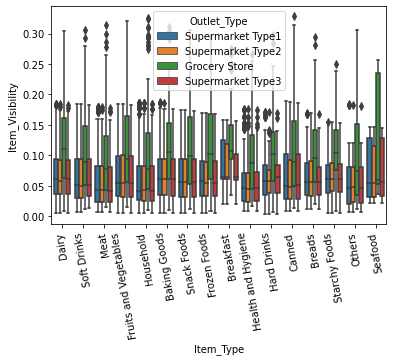

In [34]:
#Checking the visibility of each item in each outlet
ax = sns.boxplot(data = data, x = 'Item_Type', y = 'Item_Visibility', hue = 'Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 100)
plt.show()

The Item_Visibility for each Item_Type seems to be very similar for Type 1, 2 and 3 supermarkets and that is lower than Grocery Stores, in other words, buying in Grocery Stores is more expensive than in Supermarkets. So we impute missing values for each Item_Type in each Outlet_Type.

In [35]:
#Pivot table with the mean values that will be used to replace the nan values
table = data.pivot_table(values = 'Item_Visibility', index = 'Item_Type', columns = 'Outlet_Type', aggfunc = 'mean')
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.116306,0.066692,0.068206,0.066524
Breads,0.111612,0.067579,0.067976,0.066038
Breakfast,0.126056,0.079993,0.083079,0.078609
Canned,0.112484,0.066167,0.064655,0.067549
Dairy,0.120742,0.069299,0.069000,0.069213
Frozen Foods,0.115895,0.065449,0.064184,0.064816
Fruits and Vegetables,0.114820,0.067123,0.067503,0.066758
Hard Drinks,0.109913,0.064873,0.063611,0.065297
Health and Hygiene,0.098924,0.055021,0.053081,0.054924


In [36]:
#Replacing the NaN values
def find_mean(x):
    return table.loc[x['Item_Type'], x['Outlet_Type']]

data['Item_Visibility'].fillna(data[data['Item_Visibility'].isnull()].apply(find_mean, axis = 1), inplace = True)

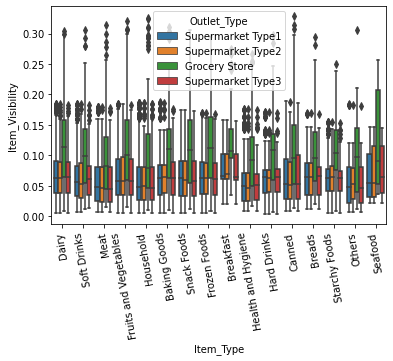

In [37]:
#Checking the visibility of each item in each outlet after handling NaN values
ax = sns.boxplot(data = data, x = 'Item_Type', y = 'Item_Visibility', hue = 'Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 100)
plt.show()

In [38]:
#Checking how many entries have 0 value after handing NaN
data['Item_Visibility'].value_counts().head()

0.067123    81
0.065578    79
0.057774    61
0.065449    55
0.066692    53
Name: Item_Visibility, dtype: int64

# Combine Low Fat, low fat and LF to Low Fat and reg to Regular

In [39]:
#Combining Low Fat, low fat and LF to Low Fat also reg to Regular
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                             'low fat': 'Low Fat', 
                                                             'reg': 'Regular'})
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [40]:
#Printing frequency of Item_Fat_Content column
print('\nFrequency of Categories for variable Item_Fat_Content')
print(data['Item_Fat_Content'].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


# Feature Engineering

In [41]:
#Adding 1 column in the dataset named Outlet Age which will reflect how old the outlets are
data['Outlet_Age'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Age'].head(5)

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Age, dtype: int64

In [42]:
#Stats of Outlet_Age
data['Outlet_Age'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Age, dtype: float64

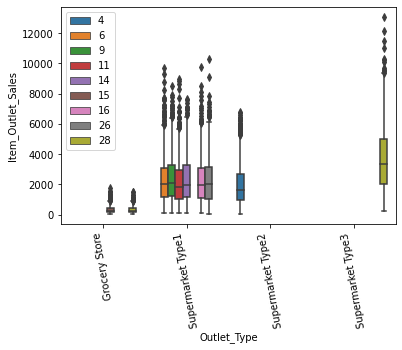

In [43]:
#Using plot to visualize the how old the outlets are
ax = sns.boxplot(data = data, x = 'Outlet_Type', y = 'Item_Outlet_Sales', hue = 'Outlet_Age', order =['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 100)
leg = ax.legend()
ax.legend(loc='upper left')
plt.show()

From the above box plot I can observe that, the Supermarket Type 3 is the oldest, have been stablished 28 years ago. Type 1 have been build at different times, Type 2 is the newest. Grocery stores are relatively old.

In [44]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,14
3,FDX07,19.20,Regular,0.114820,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,15
4,NCD19,8.93,Low Fat,0.057774,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,26


# I have noticed that, the Item_Identifiers column data starts with letters. Let's see what they are and what they mean.

In [45]:
#Checking unique value of Item_Identifier and Keeping them in new column.
data['Item_Identifier'] = data['Item_Identifier'].astype(str).str[:3]
data['Item_Identifier'].unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

These seem to stand for Food, Drink and Non-Consumable items. Next I will be renaming them to be more intuitive.

In [46]:
data['Item_Identifier'] = data['Item_Identifier'].astype(str).str[:2]
data['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [47]:
#Renaming unique values as Food, Drink and Non Consumable items 
data['Item_Identifier'] = data['Item_Identifier'].map({'FD': 'Food', 'DR':'Drink', 'NC':'Non-Consumable'})

In [48]:
data['Item_Identifier'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: Item_Identifier, dtype: int64

# Change value of the 'Item_Fat_Content' of the items that are non-consumables.

In [49]:
#Changing the name of Item_Fat_content of the items which are non-cosumable
data.loc[data['Item_Identifier'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

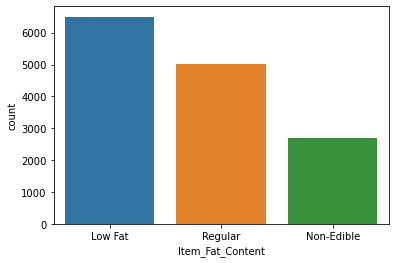

In [50]:
#Count plot of Item_Fat_Content
sns.countplot(data["Item_Fat_Content"])
plt.show()

From the above count plot I can say that Low Fat food items are sold more followed by Regular and Non-Edible.

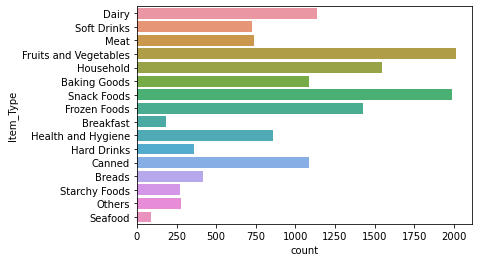

In [51]:
#Count plot of Item_type
sns.countplot(y = 'Item_Type',data = data)
plt.show()

In the above plot I can see that, the Fruits and vegetables are sold the maximum across the outlets, followed by Snackfood and household items. Seafood and Breakfast items were sold the least

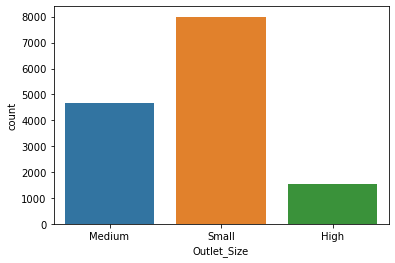

In [52]:
#Checking the ccounts of Oulet_Size category
sns.countplot(x = 'Outlet_Size',data = data)
plt.show()

In terms of size in outlet, Small is dominating followed by medium.

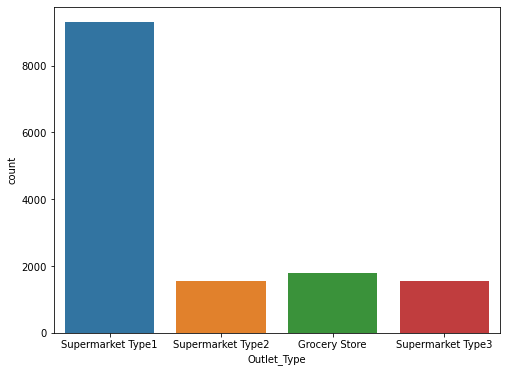

In [53]:
#Checking count of Outlet_type
plt.figure(figsize = (8,6))
sns.countplot(x = 'Outlet_Type',data = data)
plt.show()

Supermarket Type 1 has the maximum data where as the difference with other outlet types is huge.

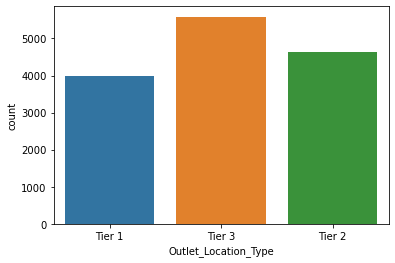

In [54]:
#Checking count of Outlet_Location_type
sns.countplot(x = 'Outlet_Location_Type',data = data)
plt.show()

In Outlet_Location_Type Tier 3 has the maximum presence followed by Tier 2 and Tier 1.

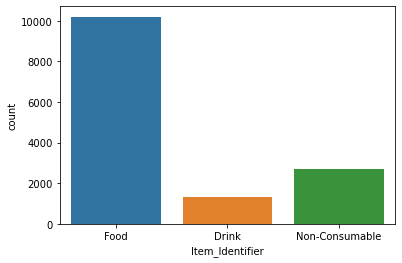

In [55]:
#Checking count of Outlet_Location_type
sns.countplot(x = 'Item_Identifier',data = data)
plt.show()

In every outlet Food items are sold more followed by Non-consumable items and Drinks.

In [56]:
df = data.copy()

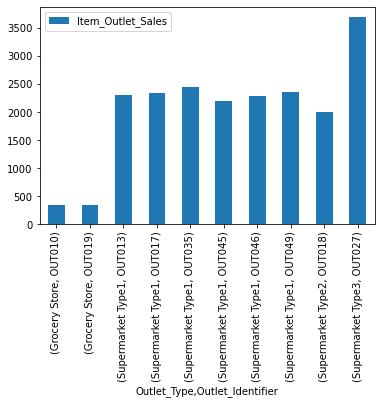

In [57]:
#Checking Sales for each outlet
df.groupby(['Outlet_Type','Outlet_Identifier']).agg({'Item_Outlet_Sales':np.mean}).plot.bar()
X = plt.gca().xaxis

Supermarket Type 3(OUT027) contributes highest in the Sales. Rest other are close to each other but very less sale is generated from Grocery store (OUT010 and OUT019)

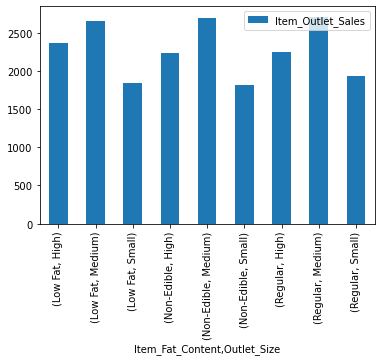

In [58]:
#Checking Sales of Item_Fat_Content in Outlet_size
df.groupby(['Item_Fat_Content','Outlet_Size']).agg({'Item_Outlet_Sales':np.mean}).plot.bar()
X = plt.gca().xaxis

Non-Edible item from Small type of outlet generates the less income followed by Low Fat item from small type of outlet.

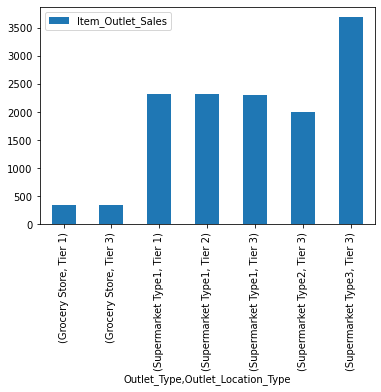

In [59]:
#Checking the sales count for each locations and their outlet types.
df.groupby(['Outlet_Type','Outlet_Location_Type']).agg({'Item_Outlet_Sales':np.mean}).plot.bar()
X = plt.gca().xaxis

Supermarket Type 3 and Tier 3 location generates the highest sales. Grocery store in Tier 1 and 3 locations are generating the least sales output.

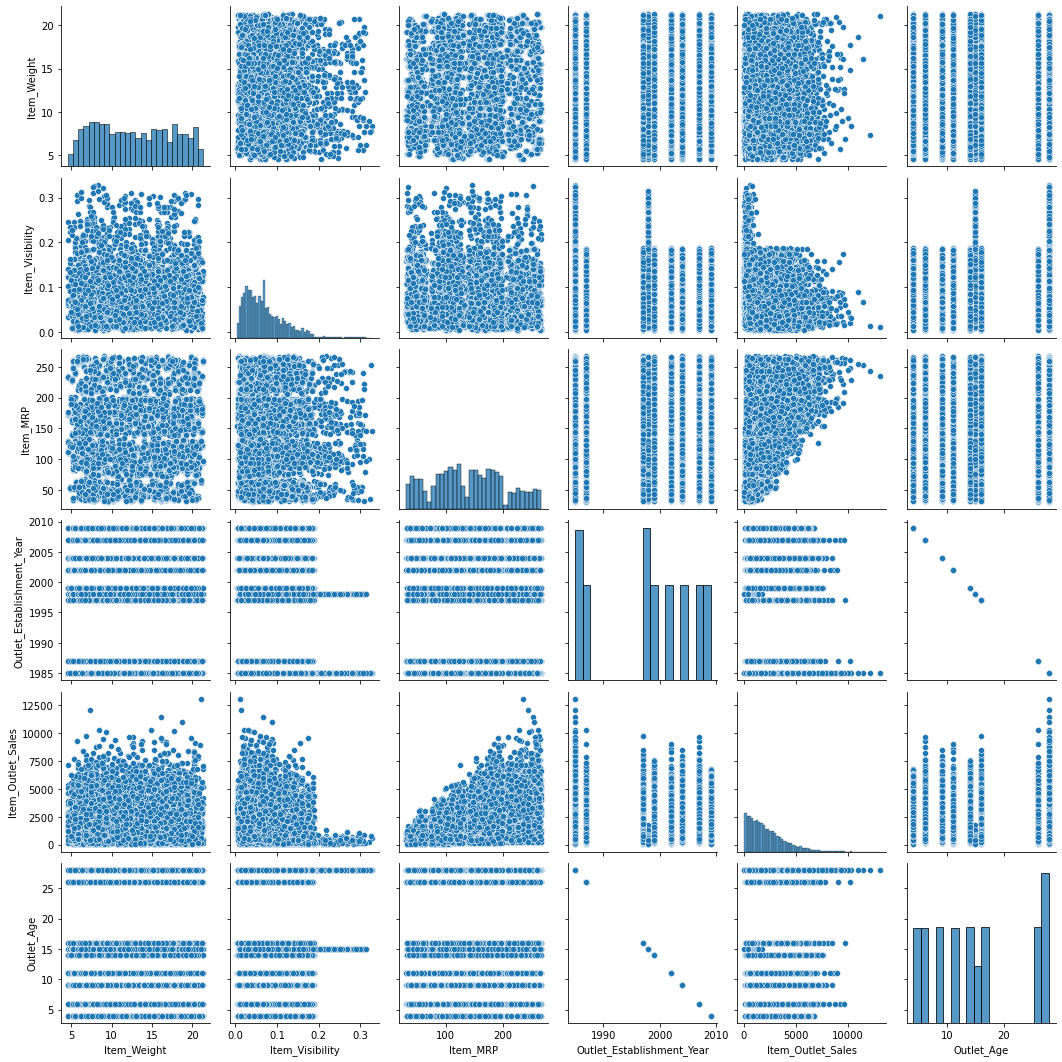

In [60]:
#Ploting pairplot
sns.pairplot(data = data)
plt.show()

# Correlation Matrix

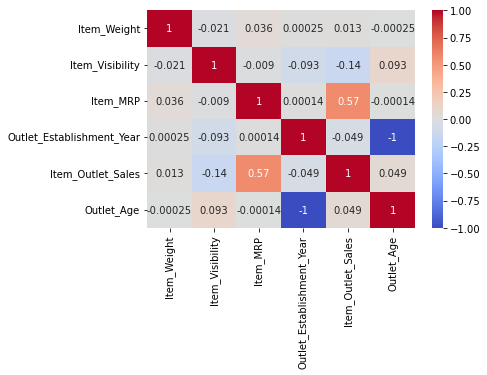

In [61]:
#Checking relationship between features
corr = data.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

From the above heatmap I can say that Item_Outlet_Sales has good relationship with Item_MRP

# Change categorical data into Numerical value

In [62]:
#Import Label Encoder
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [63]:
#Keeping all object data into one variable
Object = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [64]:
#Tranforming object data using Label Encoder
for i in Object:
    data[i] = lab_enc.fit_transform(data[i])

In [65]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,1,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,train,14
1,0,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228,train,4
2,1,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,train,14
3,1,19.20,2,0.114820,6,182.0950,0,1998,2,2,0,732.3800,train,15
4,2,8.93,1,0.057774,9,53.8614,1,1987,0,2,1,994.7052,train,26


In [66]:
#Droping Item Identifier as I have already categorized the same with Item_type
data = data.drop(columns = 'Item_Identifier')

In [67]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,train,14
1,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228,train,4
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,train,14
3,19.20,2,0.114820,6,182.0950,0,1998,2,2,0,732.3800,train,15
4,8.93,1,0.057774,9,53.8614,1,1987,0,2,1,994.7052,train,26


# Next I will check Skewness for the features

In [68]:
#Checking skewness
data.skew()

Item_Weight                  0.100417
Item_Fat_Content             0.205470
Item_Visibility              1.298627
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Identifier           -0.059994
Outlet_Establishment_Year   -0.396465
Outlet_Size                 -0.861786
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales            1.177531
Outlet_Age                   0.396465
dtype: float64

In [69]:
#Seeing Skewness in Item Visibility column will apply np.sqrt to remove the skewness.
data['Item_Visibility'] = np.sqrt(data['Item_Visibility'])

In [70]:
#Checking skewness after applying sqrt
data.skew()

Item_Weight                  0.100417
Item_Fat_Content             0.205470
Item_Visibility              0.407396
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Identifier           -0.059994
Outlet_Establishment_Year   -0.396465
Outlet_Size                 -0.861786
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales            1.177531
Outlet_Age                   0.396465
dtype: float64

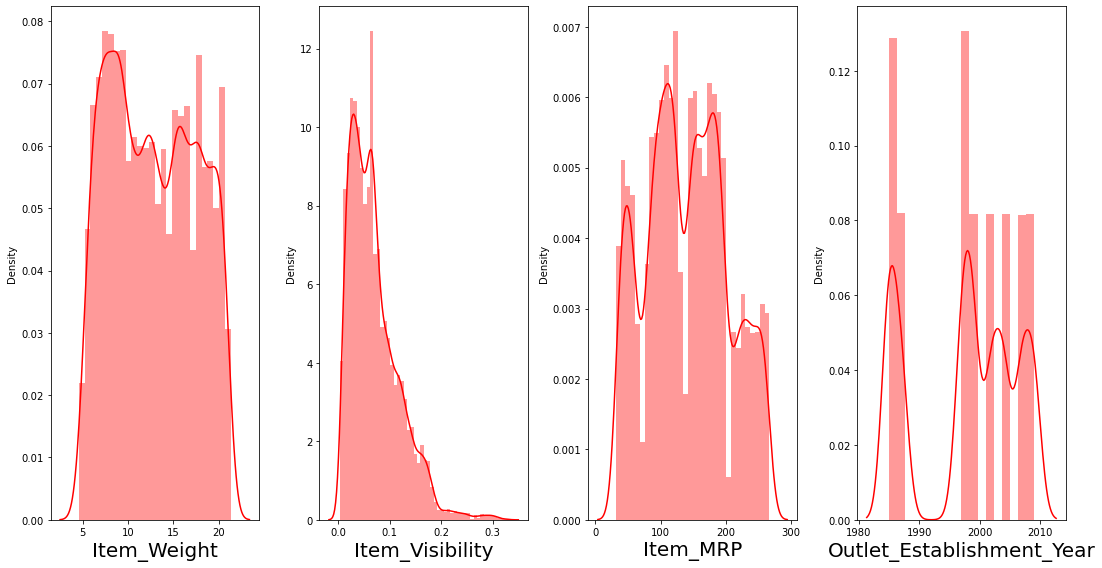

In [71]:
#Checking how data is distributed for every column.
plt.figure(figsize = (15,8))

plotnumber = 1

for column in data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]:
    if plotnumber <= 4:
        ax = plt.subplot(1,4,plotnumber)
        sns.distplot(df[column], color = 'r')
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
    
plt.tight_layout()

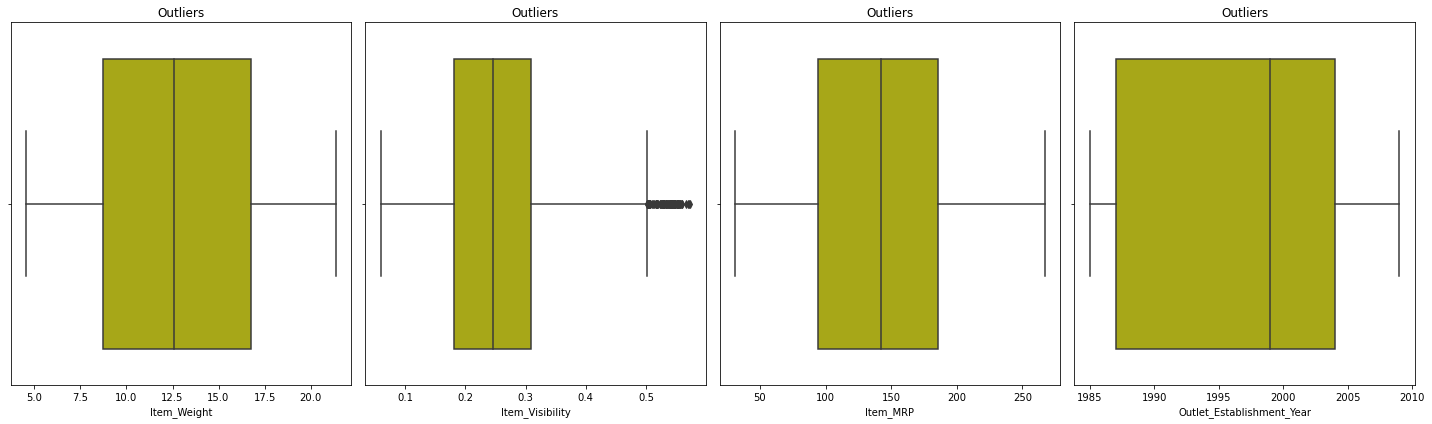

In [72]:
#Check for outliers using box plot
plt.figure(figsize = (20,6))
plotnumber = 1

for column in data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]:
    if plotnumber <= 4:
        plt.subplot(1,4,plotnumber)
        sns.boxplot(data[column], color = 'y')
        plt.xlabel(column)
        plt.title('Outliers')
    
    plotnumber += 1
    
plt.tight_layout() 

Seeing outliers in Item_Visibility will handle it using IQR method.

In [73]:
#Remove outliers for Item_Visibility
def remove_outliers_Item_Visibility(data):
    IQR = data['Item_Visibility'].quantile(0.75) - data['Item_Visibility'].quantile(0.25)
    
    higher_range = data['Item_Visibility'].quantile(0.75) + (1.5 * IQR)
    
    data.loc[data['Item_Visibility'] >= higher_range, 'Item_Visibility'] = higher_range

In [74]:
remove_outliers_Item_Visibility(data)

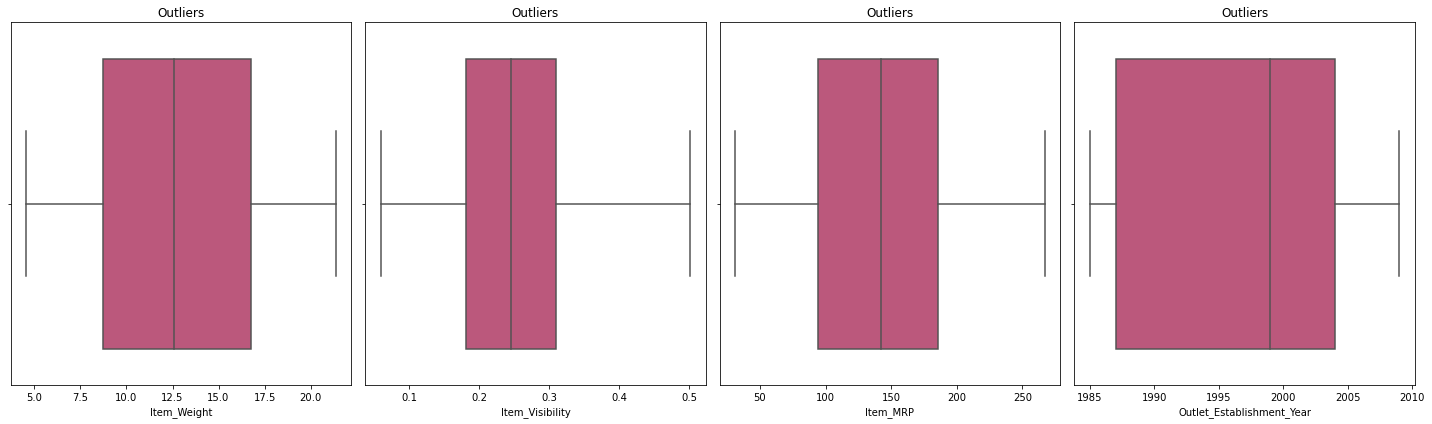

In [75]:
#Ploting boxplot after removing outliers
plt.figure(figsize = (20,6))
plotnumber = 1

for column in data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]:
    if plotnumber <= 4:
        plt.subplot(1,4,plotnumber)
        sns.boxplot(data[column], palette = 'plasma')
        plt.xlabel(column)
        plt.title('Outliers')
    
    plotnumber += 1
    
plt.tight_layout() 

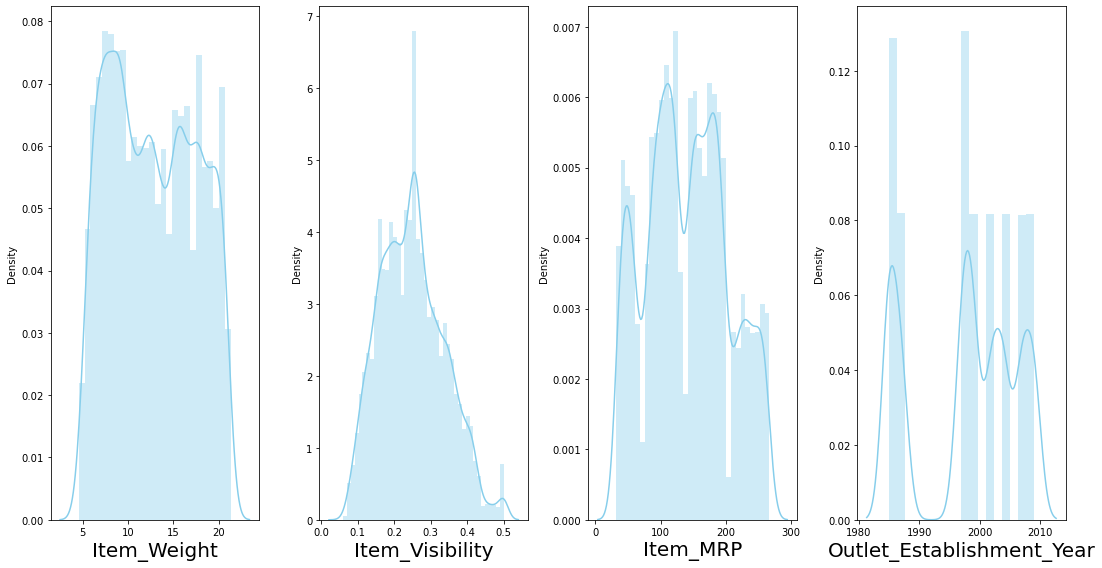

In [76]:
#Outliers have been removed now will check distribution again.

#Checking how data is distributed for every column.
plt.figure(figsize = (15,8))

plotnumber = 1

for column in data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]:
    if plotnumber <= 4:
        ax = plt.subplot(1,4,plotnumber)
        sns.distplot(data[column], color = 'skyblue')
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
    
plt.tight_layout()

# After removing outliers data distribution is looking good. Next I will split data into X and Y variable.

In [77]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,9.30,0,0.126678,4,249.8092,9,1999,1,0,1,3735.1380,train,14
1,5.92,2,0.138846,14,48.2692,3,2009,1,2,2,443.4228,train,4
2,17.50,0,0.129461,10,141.6180,9,1999,1,0,1,2097.2700,train,14
3,19.20,2,0.338852,6,182.0950,0,1998,2,2,0,732.3800,train,15
4,8.93,1,0.240361,9,53.8614,1,1987,0,2,1,994.7052,train,26


In [78]:
Train = data.loc[data['source'] == 'train']
Test = data.loc[data['source'] == 'test']

In [79]:
x = Train.drop(columns = ['Item_Outlet_Sales','source', 'Outlet_Establishment_Year'])
y = Train['Item_Outlet_Sales']

In [80]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,9.30,0,0.126678,4,249.8092,9,1,0,1,14
1,5.92,2,0.138846,14,48.2692,3,1,2,2,4
2,17.50,0,0.129461,10,141.6180,9,1,0,1,14
3,19.20,2,0.338852,6,182.0950,0,2,2,0,15
4,8.93,1,0.240361,9,53.8614,1,0,2,1,26


In [81]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [82]:
x.shape

(8523, 10)

In [83]:
y.shape

(8523,)

# Scaling x dataset

In [84]:
#Importing standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [85]:
#Scaling x data
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# Checking for correlation using VIF

In [86]:
#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

In [88]:
#Let's check values
vif

,vif,features
0,1.002640,Item_Weight
1,1.005063,Item_Fat_Content
2,1.056390,Item_Visibility
3,1.008602,Item_Type
4,1.001926,Item_MRP
5,4.146149,Outlet_Identifier
6,1.700204,Outlet_Size
7,5.452067,Outlet_Location_Type
8,2.662210,Outlet_Type
9,1.282897,Outlet_Age


# Outlet_Location_Type has VIF value more than 5 I will drop that column and print VIF again.

In [89]:
x = x.drop(columns = 'Outlet_Location_Type')

In [90]:
x_scaled = sc.fit_transform(x)

In [91]:
#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

In [92]:
vif

,vif,features
0,1.002577,Item_Weight
1,1.005045,Item_Fat_Content
2,1.056354,Item_Visibility
3,1.008572,Item_Type
4,1.001862,Item_MRP
5,1.148980,Outlet_Identifier
6,1.621293,Outlet_Size
7,1.280213,Outlet_Type
8,1.246003,Outlet_Age


# No more multicollinearity issue next will go ahead and split the data into train and test part.

In [93]:
#Import train test split
from sklearn.model_selection import train_test_split

In [94]:
#Spliting dataset into train and test.
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

# Model Building

In [95]:
#Defining function to fit and check model metrics
def reg(model,x_train,y_train):
    
    #Train models
    model.fit(x_train,y_train)
    
    #Predict x_test
    pred = model.predict(x_test)

    #Calculating MAE score.
    MAE = mean_absolute_error(y_test, pred)
    print('MAE Score is: ', MAE)
    
    #Calculating MSE score.
    MSE = mean_squared_error(y_test, pred)
    print('MSE Score is: ', MSE)
    
    #Calculating RMSE score. lower the RMSE is better
    RMSE = mean_squared_error(y_test, pred, squared = False)
    print('RMSE Score is: ', RMSE)
    
    #Calculate R2 score
    R2 = r2_score(y_test, pred, multioutput = 'variance_weighted') * 100
    print('R2 score is: ', R2)
    
    #Calculate cross validation score
    cv = (cross_val_score(model, x, y, cv = 5).mean())*100
    print('Cross Validation Score is: ', cv)
    
    #Calculate the difference between R2 and Cross validation. Lowe is better
    var = R2 - cv
    print('R2 - Cross Validation score is: ', var) 

In [96]:
#Linear Regression Model
model = LinearRegression(fit_intercept = True, normalize = 'deprecated')
reg(model, x_train, y_train)

MAE Score is:  915.8977320249522
MSE Score is:  1442654.1469229108
RMSE Score is:  1201.1053854358122
R2 score is:  50.70982497908603
Cross Validation Score is:  50.084673656732406
R2 - Cross Validation score is:  0.6251513223536236


In [97]:
# Decision Tree Regressor
model = DecisionTreeRegressor(criterion = "squared_error", splitter = 'best', min_samples_split = 2, min_samples_leaf = 1, random_state = 0)
reg(model, x_train, y_train)


MAE Score is:  1081.2189786510264
MSE Score is:  2323777.3698595525
RMSE Score is:  1524.3940992602775
R2 score is:  20.605092000517455
Cross Validation Score is:  12.397630697787665
R2 - Cross Validation score is:  8.20746130272979


In [98]:
# K Neighbors Regressor
model = KNeighborsRegressor(n_neighbors = 17, weights = 'uniform', algorithm = 'auto', leaf_size=30, p = 2, metric = 'minkowski')
reg(model, x_train, y_train)

MAE Score is:  803.38832228394
MSE Score is:  1246452.667237699
RMSE Score is:  1116.4464462022793
R2 score is:  57.413306401624894
Cross Validation Score is:  42.51270097948782
R2 - Cross Validation score is:  14.900605422137076


In [99]:
# Random Forest Regressor
model = RandomForestRegressor(n_estimators = 100, criterion = 'squared_error', max_depth = None, min_samples_split = 2, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 1.0)
reg(model, x_train, y_train)

MAE Score is:  808.9924540293256
MSE Score is:  1285321.53015515
RMSE Score is:  1133.7202168767874
R2 score is:  56.085300614408695
Cross Validation Score is:  55.148559137197516
R2 - Cross Validation score is:  0.9367414772111786


In [100]:
# Gradient Boosting Regressor
model = GradientBoostingRegressor(loss = 'squared_error', learning_rate = 0.1, n_estimators = 100, criterion = 'friedman_mse', min_samples_split = 2, min_samples_leaf = 1, max_depth = 3)
reg(model, x_train, y_train)

MAE Score is:  771.4373616264223
MSE Score is:  1183709.2946650535
RMSE Score is:  1087.9840507401998
R2 score is:  59.55701618966002
Cross Validation Score is:  59.36894863466533
R2 - Cross Validation score is:  0.18806755499468863


In [101]:
# Ada Boost Regressor
model = AdaBoostRegressor(base_estimator = None, n_estimators = 50, learning_rate = 1.0, loss='linear', random_state = 0,)
reg(model, x_train, y_train)

MAE Score is:  1024.9289141389238
MSE Score is:  1614543.368139745
RMSE Score is:  1270.6468306101995
R2 score is:  44.83700382090509
Cross Validation Score is:  43.57790441552919
R2 - Cross Validation score is:  1.259099405375899


In [102]:
# Extra Trees Regressor
model = ExtraTreesRegressor(n_estimators = 100, criterion = 'squared_error', max_depth = None, min_samples_split = 2, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 1.0)
reg(model, x_train, y_train)

MAE Score is:  828.1770768633431
MSE Score is:  1360216.0260875556
RMSE Score is:  1166.2829957122567
R2 score is:  53.52643172647373
Cross Validation Score is:  53.08404987433162
R2 - Cross Validation score is:  0.44238185214211256


In [103]:
# XGBoost Regressor
model = XGBRegressor()
reg(model, x_train, y_train)

MAE Score is:  841.5221475685911
MSE Score is:  1402769.5882822415
RMSE Score is:  1184.3857430255741
R2 score is:  52.07253334562259
Cross Validation Score is:  52.68929219269045
R2 - Cross Validation score is:  -0.6167588470678638


# Gradinet Boost regressor has given the best result so far next I will check feature impotance for the best model.

MAE Score is:  771.4373616264222
MSE Score is:  1183730.774523466
RMSE Score is:  1087.9939220985868
R2 score is:  59.55628230206622
Cross Validation Score is:  59.347180034334926
R2 - Cross Validation score is:  0.20910226773129637


<AxesSubplot:title={'center':'Feature Importances'}>

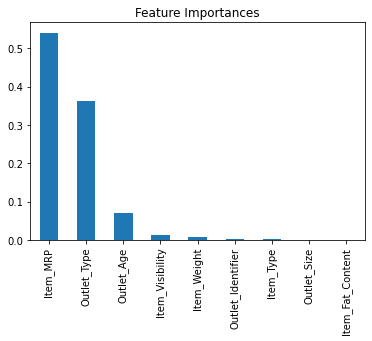

In [104]:
# Gradient Boosting Regressor
model = GradientBoostingRegressor(loss = 'squared_error', learning_rate = 0.1, n_estimators = 100, criterion = 'friedman_mse', min_samples_split = 2, min_samples_leaf = 1, max_depth = 3)
reg(model, x_train, y_train)

coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending = False)
coef.plot(kind = 'bar', title = 'Feature Importances')

# Hyper Parameter Tuning

In [105]:
#Hyperparameters for GradientBoostingRegressor
params = {'learning_rate': [0.15, 0.1, 0.10, 0.05], 
          'n_estimators': [100,150,200,250]}

#Create an instance of gradient boosting regressor
grid = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = params, scoring = 'r2')
grid.fit(x_train, y_train)
grid.best_params_, grid.best_score_

({'learning_rate': 0.05, 'n_estimators': 100}, 0.5980216557796831)

In [108]:
models = grid.best_estimator_
models.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.05)

In [109]:
reg(models, x_train, y_train)

MAE Score is:  771.1738950021406
MSE Score is:  1180096.4826913646
RMSE Score is:  1086.3224579706362
R2 score is:  59.6804526590873
Cross Validation Score is:  59.72155942614496
R2 - Cross Validation score is:  -0.0411067670576557


# I have tuned the final model but scores are not that satisfactory, still this is the best performing model so far hence I will be using it for further prediction.

# Saving the best model

In [118]:
#Importing pickle to save the best model
import pickle

#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(models, open('Grad_model', 'wb'))

In [119]:
#Prediction using the saved model
loaded_model = pickle.load(open('Grad_model','rb'))

In [120]:
#Loading model
sales = loaded_model.predict(x_test)
sales

array([2588.96033921, 1844.05003116, 2158.57929958, ..., 4071.15970364,
        177.43635745, 5810.04919253])

In [121]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
DF = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': sales})
DF.head()

,Actual Sales,Predicted Sales
4931,1426.1436,2588.960339
4148,1201.7690,1844.050031
7423,1836.2764,2158.579300
4836,2410.8618,2209.179787
944,1549.9824,3025.513392


# Visualizing Error Residual

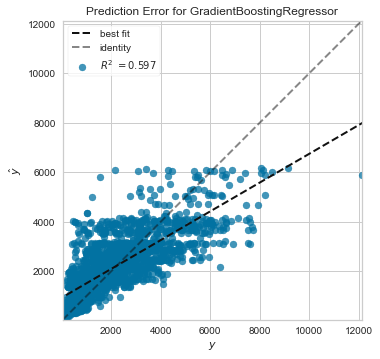

In [116]:
#Importing Prediction Error and Residuals Plot
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(models)

#Fit the training data to the visualizer and evaluate the model on the test data
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof() 
plt.show()

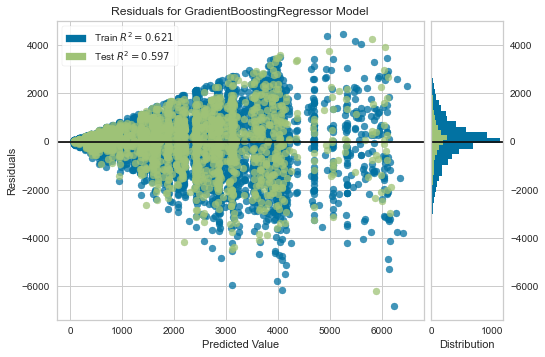

In [117]:
#Residual for Adaboost model
visualizer = ResidualsPlot(models)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test) 
visualizer.poof()
plt.show()